In [156]:
from sklearn.decomposition import PCA as sklearn_pca
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import importlib
import time
import pca_module
importlib.reload(pca_module)

def print_numpy(ndarray):
    ndarray = np.asarray(ndarray)
    with np.printoptions(precision=4, suppress=True, formatter={'float': '{:0.4f}'.format}, linewidth=100):
        print(ndarray)

SIZE = 100

##############################################################################################################################################################################################################################################################################
# Experiment 1: 
* five randomly created gaussian features

# Expectations:
* since they are not strongly correlated, the eigenvalues should be approximately the same

# Results:
* Results as expected, principal components roughly explain the same amount of variance
* Example which was yielded with one out of many runs: [0.2582 0.2235 0.1571 0.1682 0.1929]
* Results are the same for both eigen decomposition and singular value decomposition

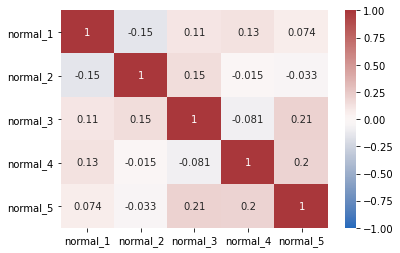


Dataset dimensions:
(100, 5)

Starting dataset head:
    normal_1   normal_2    normal_3    normal_4  normal_5
0   9.166985  10.468622   83.073162  -35.074945  2.927809
1  10.609545  12.676719  203.442468    6.611112  3.615868
2   7.785390 -20.405434   82.891185   30.602659  2.698760
3   9.219814  15.255663   99.672531   17.814080  2.402007
4   8.268051   3.042865   57.683079  125.357603  2.404693

Scaled dataset head:
   normal_1  normal_2  normal_3  normal_4  normal_5
0 -0.244465 -0.010569 -0.340109 -0.751193 -0.169691
1  0.042548  0.146908  1.729792 -0.076030  1.177117
2 -0.519348 -2.212456 -0.343238  0.312547 -0.618031
3 -0.233954  0.330834 -0.054662  0.105418 -1.198895
4 -0.423317 -0.540162 -0.776723  1.847235 -1.193637

Covariance matrix:
[[0.9900 -0.1466 0.1125 0.1266 0.0733]
 [-0.1466 0.9900 0.1531 -0.0151 -0.0328]
 [0.1125 0.1531 0.9900 -0.0803 0.2057]
 [0.1266 -0.0151 -0.0803 0.9900 0.1979]
 [0.0733 -0.0328 0.2057 0.1979 0.9900]]
_____________________________________________

In [157]:
# gaussian distributed features generated at random
normal_1 = pd.Series(data = np.random.normal(loc = 10, scale = 5, size = SIZE), name = 'normal_1')
normal_2 = pd.Series(data = np.random.normal(loc = 10, scale = 15, size = SIZE), name = 'normal_2')
normal_3 = pd.Series(data = np.random.normal(loc = 100, scale = 66, size = SIZE), name = 'normal_3')
normal_4 = pd.Series(data = np.random.normal(loc = 10, scale = 60, size = SIZE), name = 'normal_4')
normal_5 = pd.Series(data = np.random.normal(loc = 3, scale = 0.5, size = SIZE), name = 'normal_5')

dataset_1 = pd.concat([normal_1, normal_2, normal_3, normal_4, normal_5], axis = 1)

correlation_matrix = dataset_1.corr()
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1, cmap = sns.color_palette("vlag", as_cmap=True)) 
plt.show()

pca_eigen_dict = pca_module.pca(dataset_1, svd = False)
pca_svd_dict = pca_module.pca(dataset_1, svd = True)

##############################################################################################################################################################################################################################################################################
# Experiment 2:
* two random gaussian features
* three derived features from the initial two out of which 2 are strongly correlated

# Expectations:

# Results:
* Two of the principal components explain most of the variance with the less correlated feature coming on third place, and the two strongly correlated features having small eigenvalues i.e. principal components importance
* Example which was yielded with one out of many runs: [0.4569 0.3137 0.1968 0.0033 0.0293]
* Results are the same for both eigen decomposition and singular value decomposition



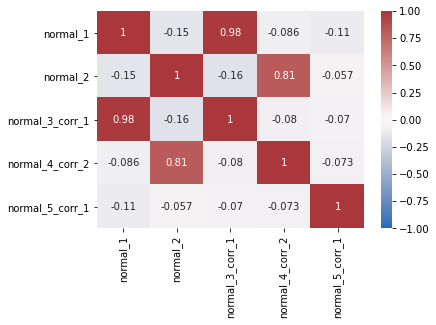


Dataset dimensions:
(100, 5)

Starting dataset head:
    normal_1   normal_2  normal_3_corr_1  normal_4_corr_2  normal_5_corr_1
0   2.404941  53.461853         0.938663        30.695570       -15.187701
1  13.021836  15.256456        10.400923        20.060942        56.658558
2  11.742429  37.325065        13.821849        42.438163         9.974202
3   9.894052  32.290212         9.511314        38.282633        10.040362
4   6.142335   1.210310         5.506656        16.978634        31.067354

Scaled dataset head:
   normal_1  normal_2  normal_3_corr_1  normal_4_corr_2  normal_5_corr_1
0 -1.622466  2.736428        -1.858508         1.007529        -0.896222
1  0.476313  0.301952        -0.025527         0.460211         1.429004
2  0.223396  1.708180         0.637158         1.611870        -0.081884
3 -0.141997  1.387355        -0.197857         1.398002        -0.079743
4 -0.883647 -0.593078        -0.973619         0.301578         0.600772

Covariance matrix:
[[0.9900 -0.1459

In [158]:
# gaussian distributed features generated at random
normal_1 = pd.Series(data = np.random.normal(loc = 10, scale = 5, size = SIZE), name = 'normal_1')
normal_2 = pd.Series(data = np.random.normal(loc = 10, scale = 15, size = SIZE), name = 'normal_2')

# features generated with the intention of them being correlated with some of the
# randomly generated features above
normal_3_corr_1 = pd.Series(data = normal_1 + np.random.normal(loc = 0, scale = 1, size = SIZE), name = 'normal_3_corr_1')
normal_4_corr_2 = pd.Series(data = normal_2 + np.random.normal(loc = 0, scale = 10, size = SIZE), name = 'normal_4_corr_2')
normal_5_corr_1 = pd.Series(data = normal_1 - np.random.normal(loc = 0, scale = 30, size = SIZE), name = 'normal_5_corr_1')

dataset_2 = pd.concat([normal_1, normal_2, normal_3_corr_1, normal_4_corr_2, normal_5_corr_1], axis = 1)

correlation_matrix = dataset_2.corr()
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1, cmap = sns.color_palette("vlag", as_cmap=True)) 
plt.show()

pca_results_dict = pca_module.pca(dataset_2, svd = False)
pca_results_dict = pca_module.pca(dataset_2, svd = True)

##############################################################################################################################################################################################################################################################################
# Experiment 3: Time complexity of both methods as the number of features (columns) and thus the size of the covariance matrix grows.

# Results:
* AS the number of features in the dataset grows, SVD performs much better than EVD



In [159]:
number_of_features = np.linspace(2,25, 24, dtype = int) ** 2
number_of_features = number_of_features[:]
print("\nNumber of features to be analysed:")
print_numpy(number_of_features)


Number of features to be analysed:
[  4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289 324 361 400 441 484 529 576 625]


In [160]:
exec_times_eig = list()
exec_times_svd = list()
sklearn_times_svd = list()

for i in number_of_features:
    
    df = pd.DataFrame()
    for i in range(i):
        series = pd.Series(data = np.random.normal(loc = 10, scale = 5, size = SIZE))
        df = pd.concat([df, series], axis = 1)
        
    
    exec_time_eig = pca_module.pca_calculation_only(df, svd = False)
    exec_time_svd = pca_module.pca_calculation_only(df, svd = True)
    
    start = time.time()
    scaled_df = StandardScaler().fit_transform(df)
    sklearn_results = sklearn_pca().fit_transform(scaled_df)
    exec_time_sklearn = time.time() - start 
    
    exec_times_eig.append(exec_time_eig)
    exec_times_svd.append(exec_time_svd)
    sklearn_times_svd.append(exec_time_sklearn)

    
comparison_df = pd.DataFrame()
comparison_df['number of features'] = number_of_features
comparison_df['exec times svd'] = exec_times_svd
comparison_df['exec times eig'] = exec_times_eig
comparison_df['exec times sklearn_svd'] = sklearn_times_svd

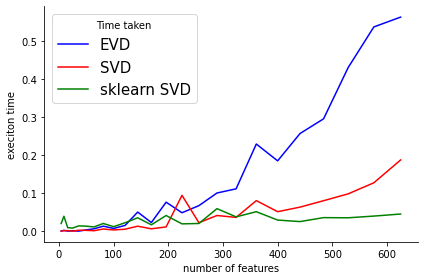

In [161]:
sns.lineplot(x = comparison_df['number of features'], y = comparison_df['exec times eig'], color = 'blue', legend = True)
sns.lineplot(x = comparison_df['number of features'], y = comparison_df['exec times svd'], color = 'red', legend = True)
sns.lineplot(x = comparison_df['number of features'], y = comparison_df['exec times sklearn_svd'], color = 'green', legend = True)

legend_labels = ['EVD','SVD', 'sklearn SVD']
plt.legend(title='Time taken', loc='upper left', labels=legend_labels, prop={'size': 15})
plt.ylabel('execiton time')
sns.despine(right = True, top = True)
sns.plotting_context()
plt.tight_layout()
plt.savefig('features_exec_time.jpg')
plt.savefig('features_exec_time.pdf')
plt.show()

##############################################################################################################################################################################################################################################################################
# Experiment 4: having perfectly 2 pairs of perfectly correlated features

# Expectations: Two of the eigen values should be zero

# Results: 
* Expectations are fulfilled
* Example result: [0.4384 0.3657 0.1959 0.0000 0.0000]



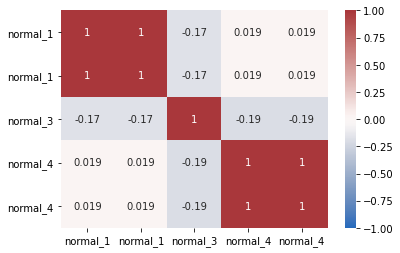


Dataset dimensions:
(100, 5)

Starting dataset head:
   normal_1  normal_1    normal_3   normal_4   normal_4
0  3.320943  3.320943  132.594527 -12.525383 -12.525383
1  4.996530  4.996530   76.084441  48.604846  48.604846
2  5.442315  5.442315  121.026105   1.940420   1.940420
3  9.808531  9.808531   89.346998  95.545612  95.545612
4  4.826809  4.826809  137.528029   1.969150   1.969150

Scaled dataset head:
   normal_1  normal_1  normal_3  normal_4  normal_4
0 -1.363807 -1.363807  0.335998 -0.375978 -0.375978
1 -1.029794 -1.029794 -0.632389  0.563061  0.563061
2 -0.940931 -0.940931  0.137755 -0.153765 -0.153765
3 -0.070567 -0.070567 -0.405115  1.284132  1.284132
4 -1.063626 -1.063626  0.420541 -0.153323 -0.153323

Covariance matrix:
[[0.9900 0.9900 -0.1665 0.0184 0.0184]
 [0.9900 0.9900 -0.1665 0.0184 0.0184]
 [-0.1665 -0.1665 0.9900 -0.1928 -0.1928]
 [0.0184 0.0184 -0.1928 0.9900 0.9900]
 [0.0184 0.0184 -0.1928 0.9900 0.9900]]
_________________________________________________________

In [162]:
# gaussian distributed features generated at random
normal_1 = pd.Series(data = np.random.normal(loc = 10, scale = 5, size = SIZE), name = 'normal_1')
normal_2 = normal_1
normal_3 = pd.Series(data = np.random.normal(loc = 100, scale = 66, size = SIZE), name = 'normal_3')
normal_4 = pd.Series(data = np.random.normal(loc = 10, scale = 60, size = SIZE), name = 'normal_4')
normal_5 = normal_4

dataset_1 = pd.concat([normal_1, normal_2, normal_3, normal_4, normal_5], axis = 1)

correlation_matrix = dataset_1.corr()
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1, cmap = sns.color_palette("vlag", as_cmap=True)) 
plt.show()

pca_eigen_dict = pca_module.pca(dataset_1, svd = False)
pca_svd_dict = pca_module.pca(dataset_1, svd = True)

##############################################################################################################################################################################################################################################################################
# Experiment 5: Comparison of speed as the size of the features grow but the number of features stays the same

# Expectations: Only the scaling should influence the execution time, so implemented SVD and EVD should have similar execution times

# Results:



In [163]:
number_of_samples = np.linspace(10,500, 25, dtype = int) ** 2
number_of_samples = number_of_samples[:]
print("\nNumber of samples to be analysed:")
print_numpy(number_of_samples)


Number of samples to be analysed:
[   100    900   2500   5041   8281  12544  17424  23104  29929  37249  45796  54756  65025  75625
  87025  99856 112896 127449 142129 157609 174724 191844 210681 229441 250000]


In [164]:
exec_times_eig = list()
exec_times_svd = list()
sklearn_times_svd = list()

for sample_size in number_of_samples:
    
    df = pd.DataFrame()
    for i in range(5):
        series = pd.Series(data = np.random.normal(loc = 10, scale = 5, size = sample_size))
        df = pd.concat([df, series], axis = 1)
        
    
    exec_time_eig = pca_module.pca_calculation_only(df, svd = False)
    exec_time_svd = pca_module.pca_calculation_only(df, svd = True)
    
    start = time.time()
    sklearn_results = sklearn_pca().fit_transform(df)
    exec_time_sklearn = time.time() - start 
    
    exec_times_eig.append(exec_time_eig)
    exec_times_svd.append(exec_time_svd)
    sklearn_times_svd.append(exec_time_sklearn)

    
comparison_df = pd.DataFrame()
comparison_df['number of samples'] = number_of_samples
comparison_df['exec times svd'] = exec_times_svd
comparison_df['exec times eig'] = exec_times_eig
comparison_df['exec times sklearn_svd'] = sklearn_times_svd

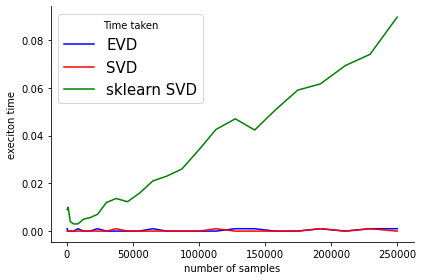

In [165]:
sns.lineplot(x = comparison_df['number of samples'], y = comparison_df['exec times eig'], color = 'blue', legend = True)
sns.lineplot(x = comparison_df['number of samples'], y = comparison_df['exec times svd'], color = 'red', legend = True)
sns.lineplot(x = comparison_df['number of samples'], y = comparison_df['exec times sklearn_svd'], color = 'green', legend = True)

legend_labels = ['EVD','SVD', 'sklearn SVD']
plt.legend(title='Time taken', loc='upper left', labels=legend_labels, prop={'size': 15})
plt.ylabel('execiton time')
sns.despine(right = True, top = True)
sns.plotting_context()
plt.tight_layout() 
plt.savefig('samples_exec_time.jpg')
plt.savefig('samples_exec_time.pdf')
plt.show()

##############################################################################################################################################################################################################################################################################
# Experiment n:

# Expectations:

# Results:



##############################################################################################################################################################################################################################################################################
# Experiment n:

# Expectations:

# Results:

